**Ensemble Learning & Random Forest**


**What is Ensemble Learning?**

**Ensemble Learning** is a technique where multiple models (called **weak learners**) are combined to form a **strong learner**.  
The idea is that individual models may not perform well, but together, they give better predictions.

>  **Many weak models + smart combination = One strong model**


**Why Use Ensemble Learning?**

- Improve accuracy
- Reduce overfitting
- Increase generalization



**Tree Algorithms in ML:**

- **Decision Tree**  (covered earlier)
- **Ensemble Learning** – (Focus of this class)
  - **Bagging** → Random Forest 
  - **Boosting** → XGBoost, LightGBM
  - **Voting / Stacking** → VotingClassifier


**Two Main Ensemble Techniques**

️**1. Bagging (Bootstrap Aggregating)**

- Trains models on random **subsets** of original data (bootstrapping)
- All models are trained **independently and in parallel**
- Final output is the **average** (regression) or **majority vote** (classification)

>  **Algorithm:** `RandomForestRegressor` or `RandomForestClassifier`

**2. Boosting**

- Trains models **sequentially**
- Each model learns from the **mistakes** of the previous one
- Examples: **XGBoost**, **LightGBM**

**3. Voting / Stacking**

- Combines predictions from **different algorithms** (e.g., KNN + DT + SVM)
- Final decision via **majority vote** or **weighted average**


**Key Concepts**

| Concept | Meaning |
|--------|---------|
| **Weak Learner** | Simple model (e.g., shallow tree) with low accuracy |
| **Strong Learner** | Combination of weak learners that gives high accuracy |
| **Bagging** | Bootstrapping + Aggregation |
| **Bootstrap Sampling** | Random sampling *with replacement* |
| **Random State** | Fixes randomness so results are repeatable |
| **Overfitting** | Model learns noise in training data → poor on new data |
| **Variance** | How much predictions change with different training data |



**What is Random Forest?**

- Ensemble model based on **Bagging**
- Builds multiple **Decision Trees** on **random subsets** of data
- Takes **average** (for regression) or **majority vote** (for classification)
- Works well for:
  - High variance reduction
  - Handling both numeric and categorical data
  - Reducing overfitting



**Random Forest Parameters**

| Parameter | Description |
|-----------|-------------|
| `n_estimators=30` | Number of trees (default: 100) |
| `random_state=0` | Ensures same output every run |
| `max_depth` | Controls tree depth (complexity) |

> In Decision Trees → One deep tree  
> In Random Forest → Multiple shallow trees trained on random data



**Ensemble Learning Helps Prevent Overfitting**

- **Overfitting = Low bias + High variance**
- Random Forest reduces **variance** by combining trees
- Output is smoother and more stable than single decision tree

> Other techniques that help reduce overfitting:  
> PCA, Cross-Validation, Regularization, Ensemble Models


**What We Learned Today:**

-  What is Ensemble Learning?
-  Types of Ensemble Techniques: Bagging, Boosting, Voting
-  How Random Forest works
-  Role of `random_state`, `n_estimators`
-  Importance of weak vs. strong learners
-  Ensemble Learning helps reduce overfitting



# All Ensemble Models Step-by-Step

**Ensemble Learning on Classification Dataset (logit classification.csv)**

In this notebook, we apply different ensemble learning techniques using Age and EstimatedSalary to predict whether a user purchased or not.

**Problem Type: Classification**

- Features (IV): Age, EstimatedSalary  
- Target (DV): Purchased (0 or 1)

**Ensemble Models Covered:**

1. Bagging (with Decision Tree)
2. Random Forest Classifier
3. Voting Classifier (Logistic, KNN, SVM)
4. Boosting (AdaBoost & XGBoost)


# Imports & Load Dataset

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Models & Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensemble Methods
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# Base Estimators
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# XGBoost (install if needed)
from xgboost import XGBClassifier

# Load Data & Prepare Inputs

In [2]:
# Load Dataset
dataset = pd.read_csv(r"C:\Users\Lenovo\Downloads\logit classification.csv")
print(" Loaded Dataset:\n", dataset.head())

 Loaded Dataset:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
# Select IVs and DV
X = dataset[["Age", "EstimatedSalary"]].values
y = dataset["Purchased"].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##  Bagging Classifier (with Decision Tree)

In [5]:
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)
bag_model.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,0
,verbose,0


In [6]:
y_pred_bag = bag_model.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print(confusion_matrix(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))


Bagging Accuracy: 0.92
[[63  5]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



## Random Forest Classifier

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.92
[[63  5]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



## Voting Classifier (Logistic + KNN + SVC)

In [10]:
# Create Base Models
log_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()
svc_clf = SVC(probability=True)

In [11]:
# Voting Ensemble
vote_model = VotingClassifier(
    estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svc_clf)],
    voting='soft'  # 'hard' for majority class, 'soft' for probability average
)
vote_model.fit(X_train, y_train)

,estimators,"[('lr', ...), ('knn', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [12]:
y_pred_vote = vote_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_vote))
print(confusion_matrix(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))

Voting Classifier Accuracy: 0.86
[[65  3]
 [11 21]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        68
           1       0.88      0.66      0.75        32

    accuracy                           0.86       100
   macro avg       0.87      0.81      0.83       100
weighted avg       0.86      0.86      0.85       100



## AdaBoost Classifier

In [13]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_model.fit(X_train, y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,0


In [14]:
y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.94
[[65  3]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.91      0.91      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



## XGBoost Classifier

In [15]:
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [16]:
y_pred_xgb = xgb_model.predict(X_test)

print(" XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

 XGBoost Accuracy: 0.9
[[63  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        68
           1       0.84      0.84      0.84        32

    accuracy                           0.90       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



# Compare All Accuracies in One Place

In [17]:
print(" Ensemble Model Accuracy Comparison:")
print(f"Bagging:        {accuracy_score(y_test, y_pred_bag):.4f}")
print(f"Random Forest:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Voting:         {accuracy_score(y_test, y_pred_vote):.4f}")
print(f"AdaBoost:       {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"XGBoost:        {accuracy_score(y_test, y_pred_xgb):.4f}")


 Ensemble Model Accuracy Comparison:
Bagging:        0.9200
Random Forest:  0.9200
Voting:         0.8600
AdaBoost:       0.9400
XGBoost:        0.9000


# Final Output: Visualization (Confusion Matrix Example)

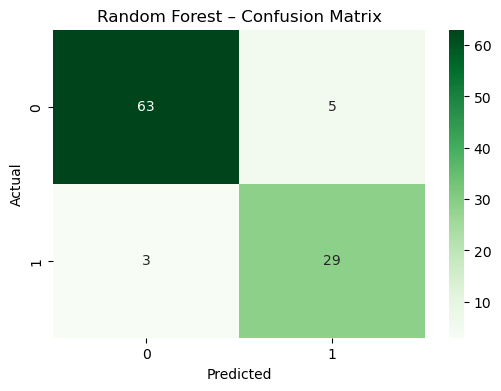

In [18]:
# Visualize Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Ensemble Model Accuracy Comparison – Final Summary

After applying five different ensemble learning techniques to the classification dataset (`Age` & `EstimatedSalary` → `Purchased`), here’s how each model performed on the test set:

| Model         | Accuracy |
|---------------|----------|
| Bagging       | 92.00%   |
| Random Forest | 92.00%   |
| Voting        | 86.00%   |
| AdaBoost      | 94.00%   |
| XGBoost       | 90.00%   |

## Insights & Explanation:

1 **Bagging vs. Random Forest:** 

Both Bagging and Random Forest performed equally well with **92% accuracy**. That’s expected, as Random Forest is an extension of Bagging using multiple decision trees with added feature randomness. It confirms ensemble techniques like Bagging significantly improve performance compared to a single decision tree.

2 **Voting Classifier:**  
    
Voting scored the lowest (**86%**) — likely because the base models (Logistic, KNN, SVM) might not have individually learned strong decision boundaries for this dataset. Also, tuning these models could improve their collective performance.

3 **AdaBoost – The Winner:** 
    
With **94% accuracy**, AdaBoost gave the best performance. It works well when boosting weak learners sequentially and correcting mistakes at every stage. It is particularly good for reducing bias and increasing accuracy when the dataset is clean and structured.

4 **XGBoost:**  
    
XGBoost, though highly powerful and optimized for speed and accuracy, achieved **90% accuracy**. It’s slightly lower than AdaBoost here — possibly due to default hyperparameters or needing deeper tuning. With parameter tuning, XGBoost often outperforms others in real-world scenarios.


## Conclusion:

- All ensemble models improved performance.
- **AdaBoost** gave the best results out of the box.
- Ensemble techniques like Bagging, Boosting, and Voting are essential tools in any machine learning pipeline, especially when you want to reduce overfitting and boost accuracy.

